# EDA and Regression Modeling 
## Objective : To Obtain finding the coefficients using Poly Regression for
---

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
import warnings
from datetime import datetime
import os

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
np.random.seed(42)

# print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
# print(f"Python Version: {sys.version}")
# print(f"Pandas Version: {pd.__version__}")
# print(f"NumPy Version: {np.__version__}")

In [7]:
#define/add all the file names to test_files list
test_files = [
    'All_Data.csv',
    'StepsTest_19V_1920.csv',
    'StepsTest_19pV_1920.csv',
    'StepsTest_20V_1900.csv',
    'StepsTest_20pV_1900.csv',
    'StepsTest_21V_1900.csv',
    'StepsTest_21pV_1900.csv',
    'StepsTest_22V_1920.csv',
    'StepsTest_22pV_1920.csv',
    'StepsTest_23V_1920.csv',
    'StepsTest_23pV_1920.csv',
    'StepsTest_24V_1920.csv',
    'StepsTest_24pV_1920.csv',
    'StepsTest_25V_1920.csv',
    'StepsTest_25pV_1920.csv',
    'Steps_UpDown_19pV_1700.csv'
]

#load all datasets
datasets = {}
for file in test_files:
    filepath = f'/home/raghav/Downloads/RC_Benchmark/Motorr Data/{file}'
    try:
        datasets[file] = pd.read_csv(filepath)
        print(f"Loaded {file}: Shape {datasets[file].shape}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

Loaded All_Data.csv: Shape (181, 3)
Loaded StepsTest_19V_1920.csv: Shape (181, 22)
Loaded StepsTest_19pV_1920.csv: Shape (181, 22)
Loaded StepsTest_20V_1900.csv: Shape (193, 22)
Loaded StepsTest_20pV_1900.csv: Shape (142, 22)
Loaded StepsTest_21V_1900.csv: Shape (138, 22)
Loaded StepsTest_21pV_1900.csv: Shape (149, 22)
Loaded StepsTest_22V_1920.csv: Shape (21, 22)
Loaded StepsTest_22pV_1920.csv: Shape (142, 21)
Loaded StepsTest_23V_1920.csv: Shape (181, 22)
Loaded StepsTest_23pV_1920.csv: Shape (181, 22)
Loaded StepsTest_24V_1920.csv: Shape (181, 22)
Loaded StepsTest_24pV_1920.csv: Shape (181, 22)
Loaded StepsTest_25V_1920.csv: Shape (181, 22)
Loaded StepsTest_25pV_1920.csv: Shape (181, 22)
Loaded Steps_UpDown_19pV_1700.csv: Shape (202, 22)


In [8]:
data_info = []
for name, df in datasets.items():
    data_info.append({
        'File': name,
        'Rows': df.shape[0],
        'Columns': df.shape[1],
        'Size (KB)': round(df.memory_usage(deep=True).sum() / 1024, 2),
        'Missing %': round((df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100, 2)
    })
summary_df = pd.DataFrame(data_info)
display(summary_df)

,File,Rows,Columns,Size (KB),Missing %
0,All_Data.csv,181,3,4.37,0.00
1,StepsTest_19V_1920.csv,181,22,31.23,22.73
2,StepsTest_19pV_1920.csv,181,22,31.23,22.73
3,StepsTest_20V_1900.csv,193,22,33.30,22.73
4,StepsTest_20pV_1900.csv,142,22,24.53,22.73
5,StepsTest_21V_1900.csv,138,22,23.84,22.73
6,StepsTest_21pV_1900.csv,149,22,25.73,22.73
7,StepsTest_22V_1920.csv,21,22,3.73,22.73
8,StepsTest_22pV_1920.csv,142,21,23.42,19.05
9,StepsTest_23V_1920.csv,181,22,31.23,22.73


In [9]:
main_df = datasets['All_Data.csv']
print("Main Dataset (All_Data.csv) Structure:")
print(f"Shape: {main_df.shape}")
display(main_df.head())

Main Dataset (All_Data.csv) Structure:
Shape: (181, 3)


,Thrust,Torque,Motor Optical Speed
0,0.009778,0.000898,0
1,0.009325,0.000956,0
2,0.009254,0.000936,0
3,0.009764,0.000965,0
4,0.001267,-0.000986,593


## EDA

In [10]:
#summary
print("Summary Statistics:")
display(main_df.describe())
missing_values = main_df.isnull().sum()
missing_percent = (missing_values / len(main_df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percent': missing_percent.values
})
print("\nMissing Values:")
display(missing_df)

Summary Statistics:


,Thrust,Torque,Motor Optical Speed
count,181.000000,181.000000,181.000000
mean,-0.423559,-0.076310,3484.591160
std,0.328005,0.055467,1607.479739
min,-1.050352,-0.180734,0.000000
25%,-0.706722,-0.124551,2169.000000
50%,-0.375773,-0.069839,3608.000000
75%,-0.118886,-0.025196,4916.000000
max,0.009778,0.000965,5954.000000



Missing Values:


,Column,Missing_Count,Missing_Percent
0,Thrust,0,0.0
1,Torque,0,0.0
2,Motor Optical Speed,0,0.0


,Thrust,Torque,Motor Optical Speed
Thrust,1.000000,0.999590,-0.972901
Torque,0.999590,1.000000,-0.978594
Motor Optical Speed,-0.972901,-0.978594,1.000000


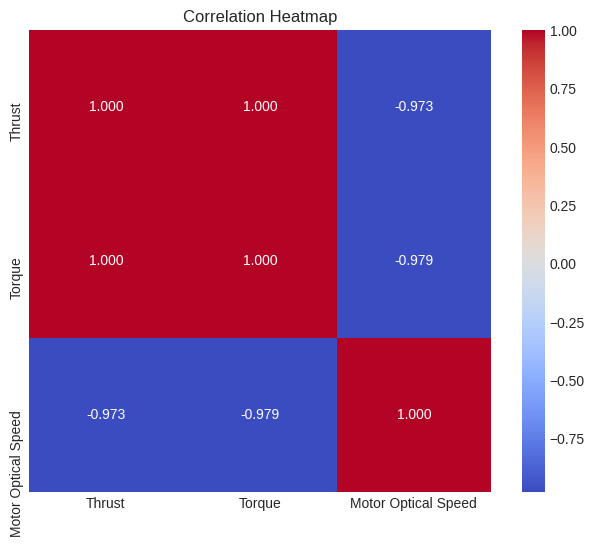

In [11]:
correlation_matrix = main_df.corr()
display(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
for col in main_df.columns:
    if main_df[col].dtype in ['float64', 'int64']:
        print(f"\n{col}:")
        print(f"  Skewness: {main_df[col].skew():.4f}")
        print(f"  Kurtosis: {main_df[col].kurtosis():.4f}")
        print(f"  Coefficient of Variation: {(main_df[col].std()/main_df[col].mean()*100):.2f}%")


Thrust:
  Skewness: -0.3348
  Kurtosis: -1.2410
  Coefficient of Variation: -77.44%

Torque:
  Skewness: -0.2787
  Kurtosis: -1.2520
  Coefficient of Variation: -72.69%

Motor Optical Speed:
  Skewness: -0.2423
  Kurtosis: -1.0524
  Coefficient of Variation: 46.13%


In [13]:
#IQR method
print("Outlier Detection (IQR Method):")
for col in main_df.columns:
    if main_df[col].dtype in ['float64', 'int64']:
        Q1 = main_df[col].quantile(0.25)
        Q3 = main_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = main_df[(main_df[col] < lower_bound) | (main_df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers ({(len(outliers)/len(main_df)*100):.2f}%)")
        print(f"  Bounds: [{lower_bound:.4f}, {upper_bound:.4f}]")

Outlier Detection (IQR Method):
Thrust: 0 outliers (0.00%)
  Bounds: [-1.5885, 0.7629]
Torque: 0 outliers (0.00%)
  Bounds: [-0.2736, 0.1238]
Motor Optical Speed: 0 outliers (0.00%)
  Bounds: [-1951.5000, 9036.5000]


In [14]:
combined_data = []

for filename, df in datasets.items():
    if 'StepsTest' in filename and filename != 'Steps_UpDown_19pV_1700.csv':
        df_copy = df.copy()
        
        if 'pV' in filename:
            voltage_str = filename.split('_')[1].replace('pV', '.5')
        else:
            voltage_str = filename.split('_')[1].replace('V', '')
        
        try:
            voltage = float(voltage_str)
            df_copy['Voltage'] = voltage
            df_copy['Test_File'] = filename
            combined_data.append(df_copy)
            print(f"Processed {filename}: {len(df_copy)} rows at {voltage}V")
        except:
            print(f"Could not extract voltage from {filename}")

combined_df = pd.concat(combined_data, ignore_index=True)
print(f"Voltage Levels: {sorted(combined_df['Voltage'].unique())}")

Processed StepsTest_19V_1920.csv: 181 rows at 19.0V
Processed StepsTest_19pV_1920.csv: 181 rows at 19.5V
Processed StepsTest_20V_1900.csv: 193 rows at 20.0V
Processed StepsTest_20pV_1900.csv: 142 rows at 20.5V
Processed StepsTest_21V_1900.csv: 138 rows at 21.0V
Processed StepsTest_21pV_1900.csv: 149 rows at 21.5V
Processed StepsTest_22V_1920.csv: 21 rows at 22.0V
Processed StepsTest_22pV_1920.csv: 142 rows at 22.5V
Processed StepsTest_23V_1920.csv: 181 rows at 23.0V
Processed StepsTest_23pV_1920.csv: 181 rows at 23.5V
Processed StepsTest_24V_1920.csv: 181 rows at 24.0V
Processed StepsTest_24pV_1920.csv: 181 rows at 24.5V
Processed StepsTest_25V_1920.csv: 181 rows at 25.0V
Processed StepsTest_25pV_1920.csv: 181 rows at 25.5V
Voltage Levels: [19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5]


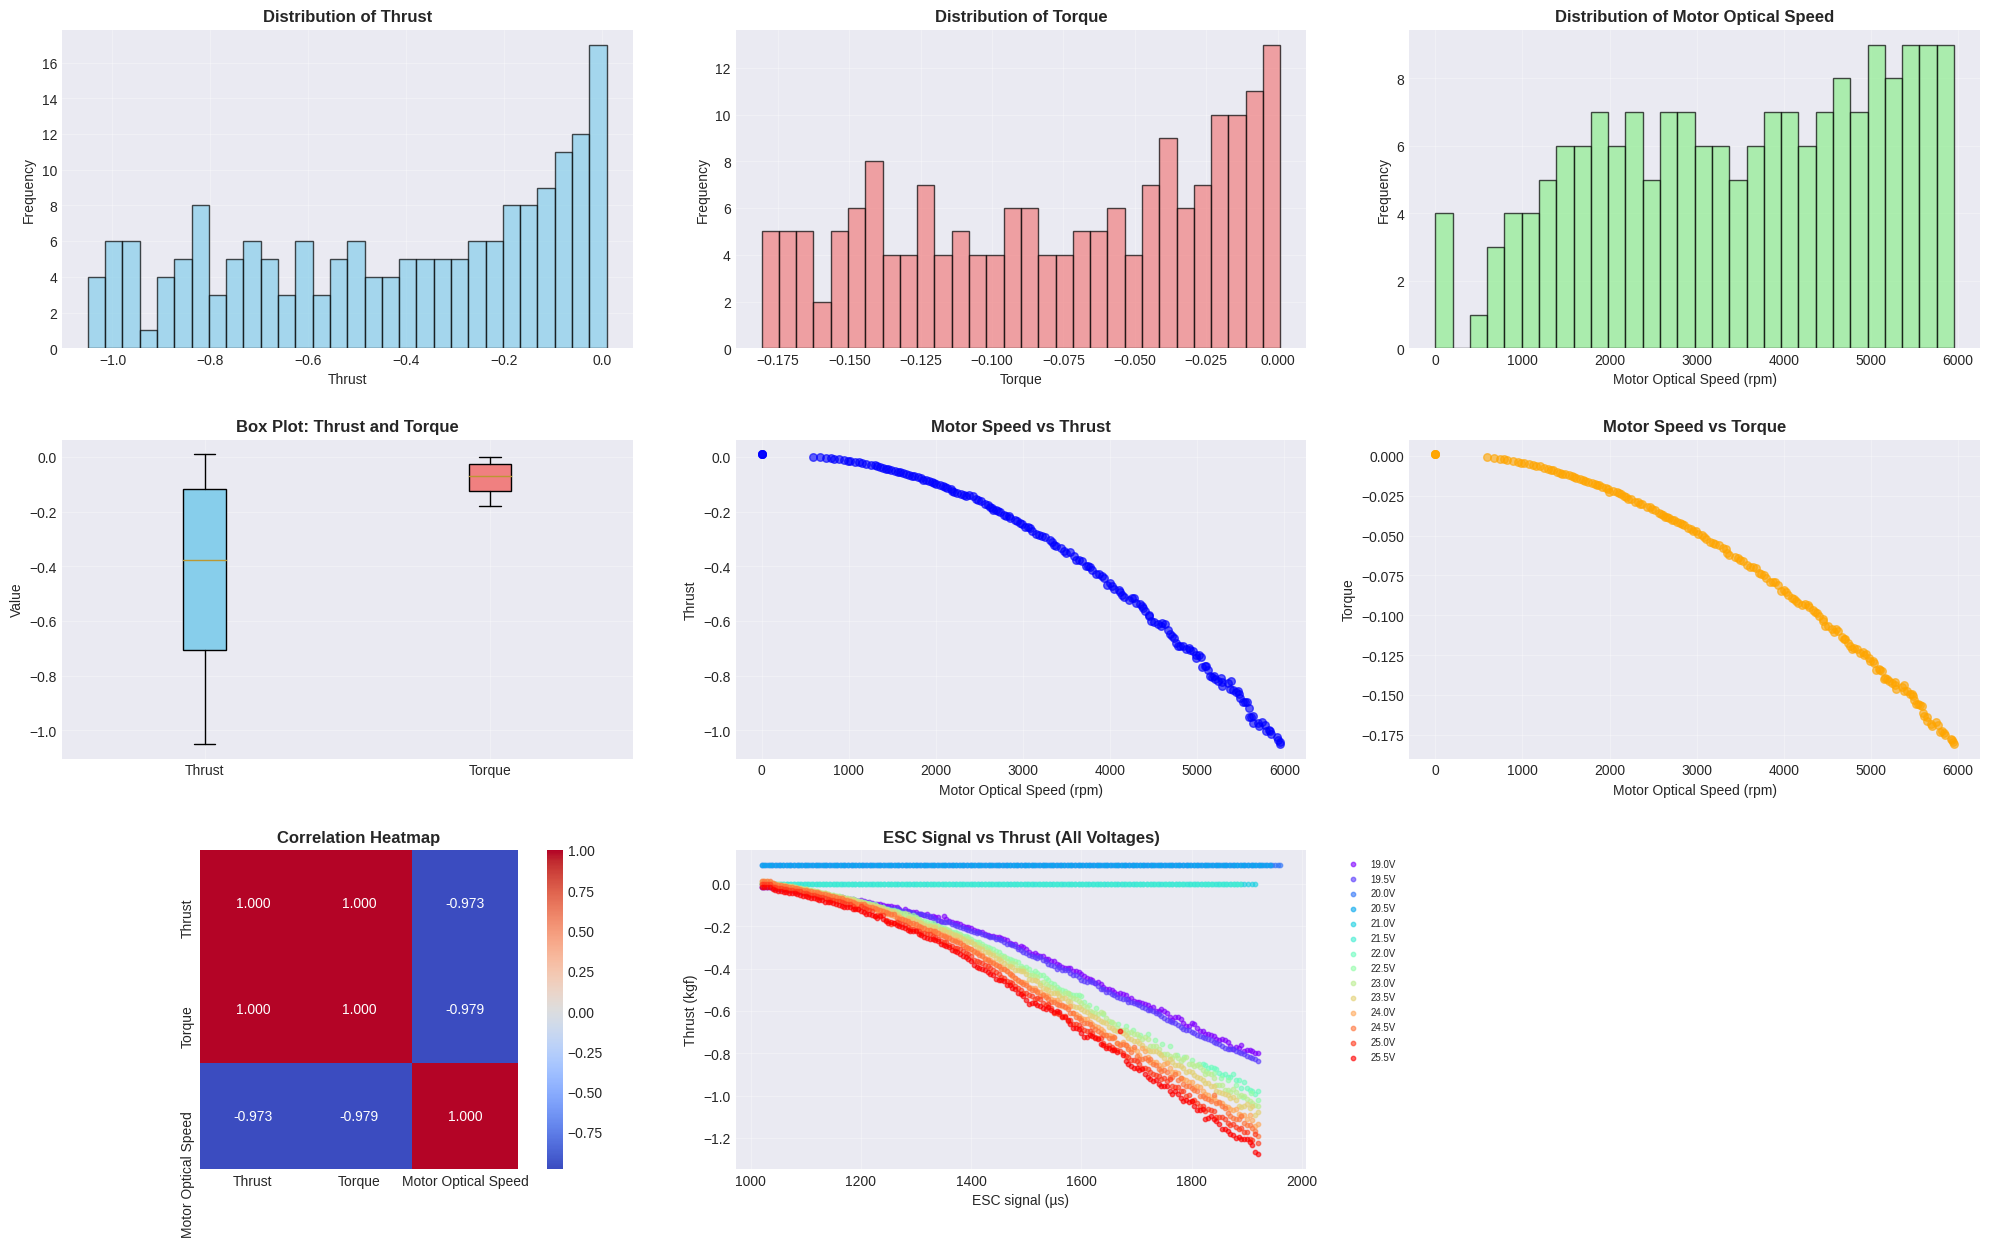

In [15]:
#visualization dashboard
fig = plt.figure(figsize=(20, 16))

#thrust
ax1 = plt.subplot(4, 3, 1)
main_df['Thrust'].hist(bins=30, edgecolor='black', alpha=0.7, color='skyblue')
ax1.set_title('Distribution of Thrust', fontsize=12, fontweight='bold')
ax1.set_xlabel('Thrust')
ax1.set_ylabel('Frequency')
ax1.grid(alpha=0.3)

#torque
ax2 = plt.subplot(4, 3, 2)
main_df['Torque'].hist(bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
ax2.set_title('Distribution of Torque', fontsize=12, fontweight='bold')
ax2.set_xlabel('Torque')
ax2.set_ylabel('Frequency')
ax2.grid(alpha=0.3)

#motor speed
ax3 = plt.subplot(4, 3, 3)
main_df['Motor Optical Speed'].hist(bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
ax3.set_title('Distribution of Motor Optical Speed', fontsize=12, fontweight='bold')
ax3.set_xlabel('Motor Optical Speed (rpm)')
ax3.set_ylabel('Frequency')
ax3.grid(alpha=0.3)

#box Plots
ax4 = plt.subplot(4, 3, 4)
box_data = main_df[['Thrust', 'Torque']].values
bp = ax4.boxplot(box_data, labels=['Thrust', 'Torque'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['skyblue', 'lightcoral']):
    patch.set_facecolor(color)
ax4.set_title('Box Plot: Thrust and Torque', fontsize=12, fontweight='bold')
ax4.set_ylabel('Value')
ax4.grid(alpha=0.3)

#speed vs thrust
ax5 = plt.subplot(4, 3, 5)
ax5.scatter(main_df['Motor Optical Speed'], main_df['Thrust'], alpha=0.6, color='blue', s=30)
ax5.set_title('Motor Speed vs Thrust', fontsize=12, fontweight='bold')
ax5.set_xlabel('Motor Optical Speed (rpm)')
ax5.set_ylabel('Thrust')
ax5.grid(alpha=0.3)

#speed vs torque
ax6 = plt.subplot(4, 3, 6)
ax6.scatter(main_df['Motor Optical Speed'], main_df['Torque'], alpha=0.6, color='orange', s=30)
ax6.set_title('Motor Speed vs Torque', fontsize=12, fontweight='bold')
ax6.set_xlabel('Motor Optical Speed (rpm)')
ax6.set_ylabel('Torque')
ax6.grid(alpha=0.3)

#correlation hmap
ax7 = plt.subplot(4, 3, 7)
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', ax=ax7, square=True)
ax7.set_title('Correlation Heatmap', fontsize=12, fontweight='bold')

#multi-V analysis
if 'ESC signal (µs)' in combined_df.columns and 'Thrust (kgf)' in combined_df.columns:
    ax8 = plt.subplot(4, 3, 8)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(combined_df['Voltage'].unique())))
    for i, voltage in enumerate(sorted(combined_df['Voltage'].unique())):
        voltage_data = combined_df[combined_df['Voltage'] == voltage]
        ax8.scatter(voltage_data['ESC signal (µs)'], voltage_data['Thrust (kgf)'], 
                   label=f'{voltage}V', alpha=0.6, s=10, color=colors[i])
    ax8.set_title('ESC Signal vs Thrust (All Voltages)', fontsize=12, fontweight='bold')
    ax8.set_xlabel('ESC signal (µs)')
    ax8.set_ylabel('Thrust (kgf)')
    ax8.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=7)
    ax8.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Stats Distribution', dpi=300, bbox_inches='tight')
plt.show()

## Simple Linear Regression

In [16]:
X = main_df[['Motor Optical Speed']].values
y = main_df['Thrust'].values

mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X_clean = X[mask]
y_clean = y[mask]

print(f"Data Preparation:")
print(f"Original samples: {len(X)}")
print(f"Clean samples: {len(X_clean)}")
print(f"Removed: {len(X) - len(X_clean)} samples with NaN values")

lr_model = LinearRegression()
lr_model.fit(X_clean, y_clean)

y_pred_lr = lr_model.predict(X_clean)

r2_lr = r2_score(y_clean, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_clean, y_pred_lr))
mae_lr = mean_absolute_error(y_clean, y_pred_lr)

print(f"\nModel Coefficients:")
print(f"Intercept (β₀): {lr_model.intercept_:.6f}")
print(f"Slope (β₁): {lr_model.coef_[0]:.6f}")
print(f"Equation: Thrust = {lr_model.intercept_:.6f} + {lr_model.coef_[0]:.6f} * Motor_Speed")

print(f"\nModel Performance Metrics:")
print(f"R-squared: {r2_lr:.6f}")
print(f"RMSE: {rmse_lr:.6f}")
print(f"MAE: {mae_lr:.6f}")

Data Preparation:
Original samples: 181
Clean samples: 181
Removed: 0 samples with NaN values

Model Coefficients:
Intercept (β₀): 0.268200
Slope (β₁): -0.000199
Equation: Thrust = 0.268200 + -0.000199 * Motor_Speed

Model Performance Metrics:
R-squared: 0.946536
RMSE: 0.075632
MAE: 0.061256


## Polynomial Regression

In [17]:
degrees = [2, 3, 4, 5]
poly_results = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_clean)
    
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly, y_clean)
    
    y_pred_poly = lr_poly.predict(X_poly)
    
    r2_poly = r2_score(y_clean, y_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_clean, y_pred_poly))
    mae_poly = mean_absolute_error(y_clean, y_pred_poly)
    
    n = len(X_clean)
    p = X_poly.shape[1]
    adj_r2 = 1 - (1-r2_poly)*(n-1)/(n-p-1)
    
    mse = mean_squared_error(y_clean, y_pred_poly)
    aic = n * np.log(mse) + 2 * (p + 1)
    bic = n * np.log(mse) + np.log(n) * (p + 1)
    
    result = {
        'Degree': degree,
        'R-squared': r2_poly,
        'Adj R-squared': adj_r2,
        'RMSE': rmse_poly,
        'MAE': mae_poly,
        'AIC': aic,
        'BIC': bic,
        'Model': lr_poly,
        'Poly': poly
    }
    
    poly_results.append(result)
    
    print(f"\nDegree {degree}:")
    print(f"  R-squared: {r2_poly:.6f}")
    print(f"  Adjusted R-squared: {adj_r2:.6f}")
    print(f"  RMSE: {rmse_poly:.6f}")
    print(f"  MAE: {mae_poly:.6f}")
    print(f"  AIC: {aic:.2f}")
    print(f"  BIC: {bic:.2f}")

best_poly_idx = np.argmax([r['Adj R-squared'] for r in poly_results])
best_poly = poly_results[best_poly_idx]

print(f"Selected Best Model: Degree {best_poly['Degree']}")
# print(f"Reason: Highest Adjusted R-squared ({best_poly['Adj R-squared']:.6f})")


Degree 2:
  R-squared: 0.999273
  Adjusted R-squared: 0.999264
  RMSE: 0.008823
  MAE: 0.006067
  AIC: -1706.42
  BIC: -1696.83

Degree 3:
  R-squared: 0.999305
  Adjusted R-squared: 0.999293
  RMSE: 0.008625
  MAE: 0.005820
  AIC: -1712.63
  BIC: -1699.84

Degree 4:
  R-squared: 0.999312
  Adjusted R-squared: 0.999297
  RMSE: 0.008578
  MAE: 0.005564
  AIC: -1712.60
  BIC: -1696.61

Degree 5:
  R-squared: 0.999318
  Adjusted R-squared: 0.999298
  RMSE: 0.008543
  MAE: 0.005537
  AIC: -1712.08
  BIC: -1692.89
Selected Best Model: Degree 5


## Regression Comparison Visuals

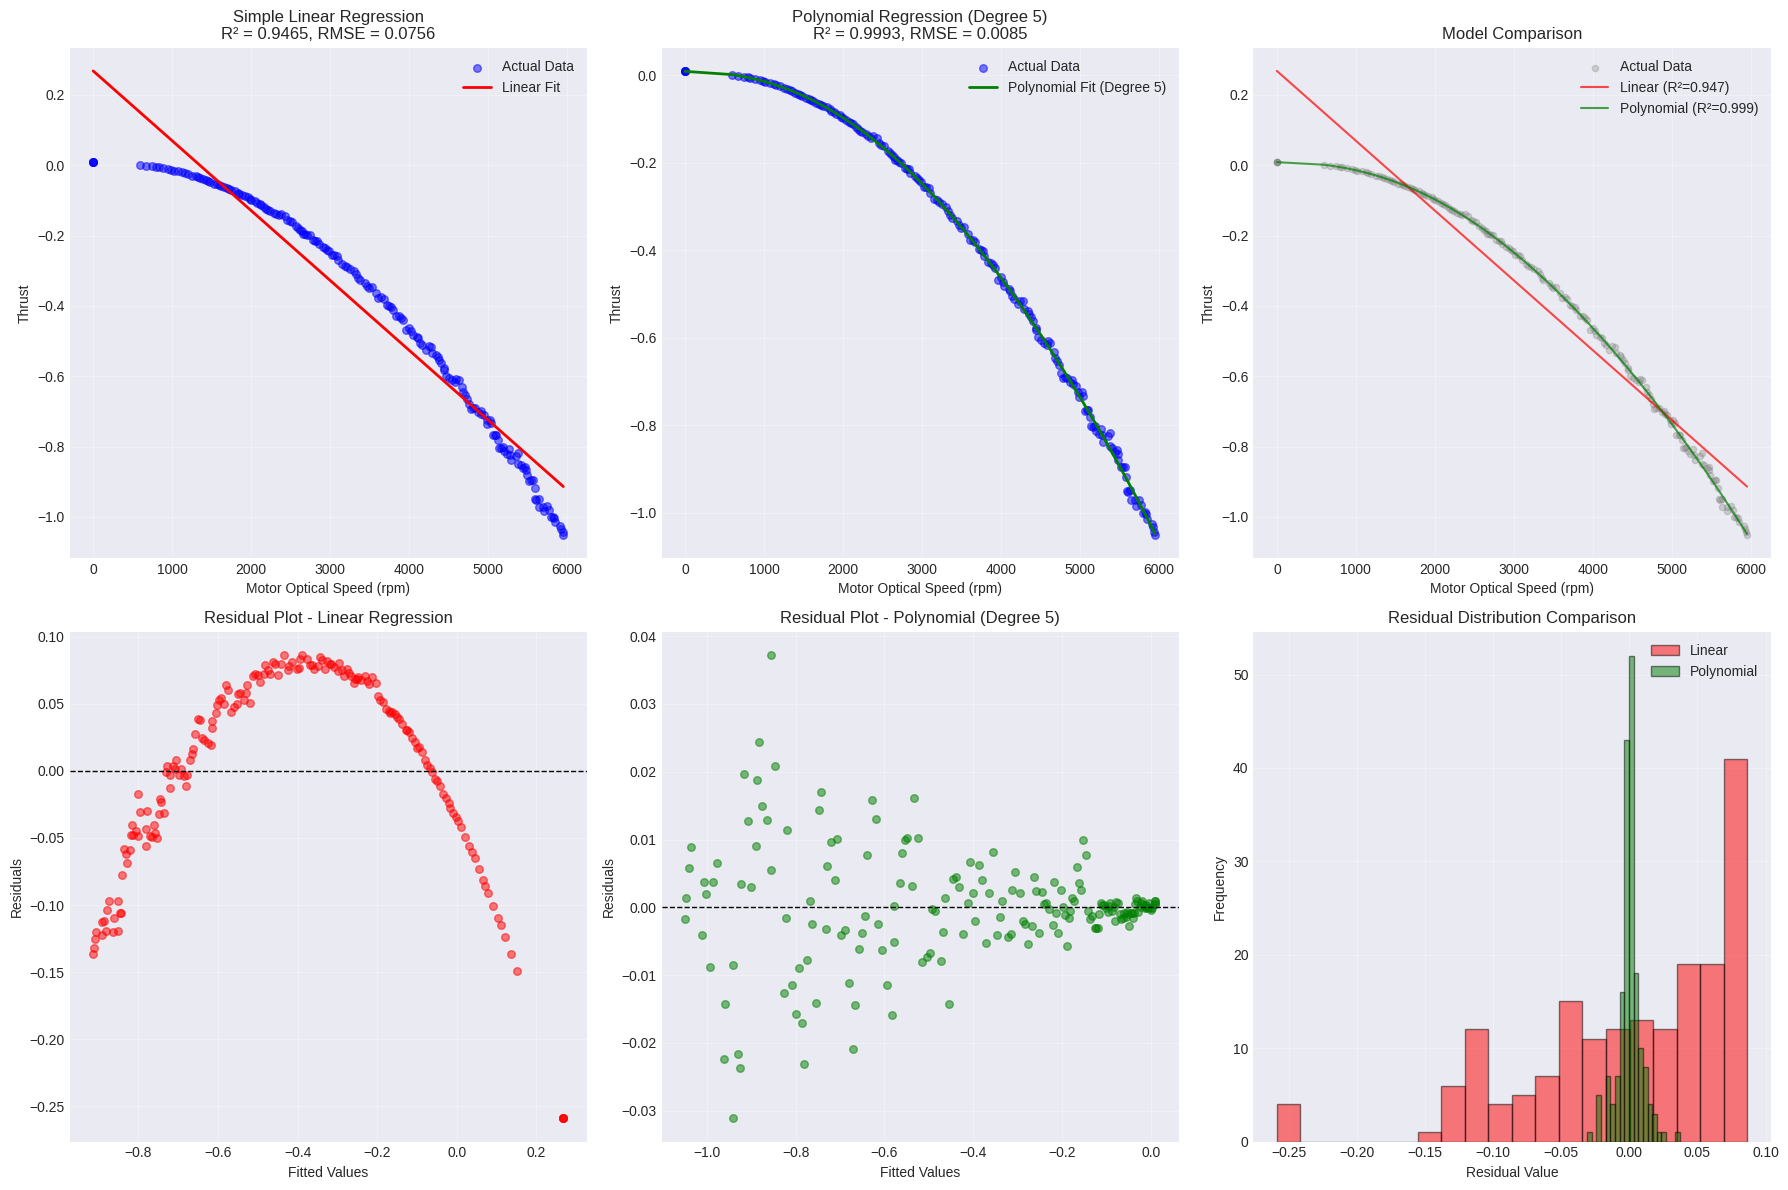

In [18]:
#final plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

#linear
ax1 = axes[0, 0]
ax1.scatter(X_clean, y_clean, alpha=0.5, s=30, label='Actual Data', color='blue')
ax1.plot(X_clean, y_pred_lr, color='red', linewidth=2, label='Linear Fit')
ax1.set_xlabel('Motor Optical Speed (rpm)')
ax1.set_ylabel('Thrust')
ax1.set_title(f'Simple Linear Regression\nR² = {r2_lr:.4f}, RMSE = {rmse_lr:.4f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

#polynomial
ax2 = axes[0, 1]
X_sorted = np.sort(X_clean.flatten())
X_sorted_poly = best_poly['Poly'].transform(X_sorted.reshape(-1, 1))
y_poly_sorted = best_poly['Model'].predict(X_sorted_poly)

ax2.scatter(X_clean, y_clean, alpha=0.5, s=30, label='Actual Data', color='blue')
ax2.plot(X_sorted, y_poly_sorted, color='green', linewidth=2, 
         label=f'Polynomial Fit (Degree {best_poly["Degree"]})')
ax2.set_xlabel('Motor Optical Speed (rpm)')
ax2.set_ylabel('Thrust')
ax2.set_title(f'Polynomial Regression (Degree {best_poly["Degree"]})\n'
              f'R² = {best_poly["R-squared"]:.4f}, RMSE = {best_poly["RMSE"]:.4f}')
ax2.legend()
ax2.grid(True, alpha=0.3)

#model comparison
ax3 = axes[0, 2]
ax3.scatter(X_clean, y_clean, alpha=0.3, s=20, label='Actual Data', color='gray')
ax3.plot(X_clean, y_pred_lr, color='red', linewidth=1.5, 
         label=f'Linear (R²={r2_lr:.3f})', alpha=0.7)
ax3.plot(X_sorted, y_poly_sorted, color='green', linewidth=1.5, 
         label=f'Polynomial (R²={best_poly["R-squared"]:.3f})', alpha=0.7)
ax3.set_xlabel('Motor Optical Speed (rpm)')
ax3.set_ylabel('Thrust')
ax3.set_title('Model Comparison')
ax3.legend()
ax3.grid(True, alpha=0.3)

#residual plot linear
ax4 = axes[1, 0]
residuals_lr = y_clean - y_pred_lr
ax4.scatter(y_pred_lr, residuals_lr, alpha=0.5, s=30, color='red')
ax4.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax4.set_xlabel('Fitted Values')
ax4.set_ylabel('Residuals')
ax4.set_title('Residual Plot - Linear Regression')
ax4.grid(True, alpha=0.3)

#residual plot polynomial
ax5 = axes[1, 1]
y_pred_poly_best = best_poly['Model'].predict(best_poly['Poly'].transform(X_clean))
residuals_poly = y_clean - y_pred_poly_best
ax5.scatter(y_pred_poly_best, residuals_poly, alpha=0.5, s=30, color='green')
ax5.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax5.set_xlabel('Fitted Values')
ax5.set_ylabel('Residuals')
ax5.set_title(f'Residual Plot - Polynomial (Degree {best_poly["Degree"]})')
ax5.grid(True, alpha=0.3)

#residual histogram comparison
ax6 = axes[1, 2]
ax6.hist(residuals_lr, bins=20, alpha=0.5, color='red', 
         label='Linear', edgecolor='black')
ax6.hist(residuals_poly, bins=20, alpha=0.5, color='green', 
         label='Polynomial', edgecolor='black')
ax6.set_xlabel('Residual Value')
ax6.set_ylabel('Frequency')
ax6.set_title('Residual Distribution Comparison')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Model Fit and Comparison', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
print(f"""
Key observations:
Linear Model: R**2 = {r2_lr:.4f}, RMSE = {rmse_lr:.4f}
Polynomial Model: R**2 = {best_poly['R-squared']:.4f}, RMSE = {best_poly['RMSE']:.4f}
Performance Gain: {((best_poly['R-squared'] - r2_lr)/r2_lr*100):.1f}% improvement
Strong Correlations: Thrust-Torque ({correlation_matrix.loc['Thrust', 'Torque']:.4f})
""")
main_df.to_csv('processed_all_data.csv', index=False)
combined_df.to_csv('combined_stepstest_data.csv', index=False)

results_summary = pd.DataFrame([
    {'Model': 'Linear Regression', 'R2': r2_lr, 'RMSE': rmse_lr, 'MAE': mae_lr},
    {'Model': f'Polynomial (Degree {best_poly["Degree"]})', 
     'R2': best_poly['R-squared'], 'RMSE': best_poly['RMSE'], 'MAE': best_poly['MAE']}
])

print("\nModel Comparison Summary:")
display(results_summary)


Key observations:
Linear Model: R**2 = 0.9465, RMSE = 0.0756
Polynomial Model: R**2 = 0.9993, RMSE = 0.0085
Performance Gain: 5.6% improvement
Strong Correlations: Thrust-Torque (0.9996)


Model Comparison Summary:


,Model,R2,RMSE,MAE
0,Linear Regression,0.946536,0.075632,0.061256
1,Polynomial (Degree 5),0.999318,0.008543,0.005537
